# k-means et images

On va utiliser l'algorithme des $k$-means pour réduire le nombre de couleurs d'une image.

Pour travailler avec des images en python, on a coutume utiliser la bibliothèque [pillow](https://pillow.readthedocs.io/en/stable/). Elle est normalement installée par défaut dans anaconda. 

Nous allons l'utiliser via [matplotlib](https://matplotlib.org/3.3.3/tutorials/introductory/images.html).

## Données images

In [15]:
import pandas

In [16]:
url = "https://www.aefinfo.fr/assets/medias/documents/4/9/493038_prv.jpeg"
import urllib
import PIL.Image
image = PIL.Image.open(urllib.request.urlopen(url))

In [17]:
import numpy as np

img = np.array(image)

In [18]:
type(img)

numpy.ndarray

In [19]:
# une couleur de pixel 
img[3, 4]

array([174, 217, 200], dtype=uint8)

In [20]:
# une ligne 
img[12]

array([[184, 217, 234],
       [184, 217, 234],
       [184, 217, 234],
       ...,
       [ 67,  71,  70],
       [ 67,  71,  70],
       [ 67,  71,  70]], dtype=uint8)

In [21]:
# une colonne

img[:, 23]

array([[199, 224, 194],
       [198, 223, 193],
       [197, 222, 193],
       ...,
       [163, 165, 190],
       [164, 166, 191],
       [158, 160, 185]], dtype=uint8)

### Créer une image

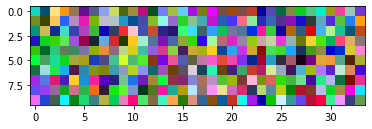

In [22]:
import random
import numpy
from matplotlib.pyplot import imshow

mon_image = []

for i in range(10):
    ligne = []
    for j in range(34):
        ligne.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])
    mon_image.append(ligne)
    
mon_image = numpy.array(mon_image)
imshow(mon_image)

In [23]:
type(mon_image)

numpy.ndarray

### Un dataframe

Nos données sont donc ici les différents pixels, donc des objets décrits par 3 variables entières. On va les ranger dans une dataframe.

On pourrait créer une dataframe initialement vide et y ajouter tous les pixels un à un, mais on va faire ça plus efficacement en : 

1. créant une liste de dataframe contenant chacun une ligne de pixels
3. concaténer ces dataframe en une seule.

In [24]:
# la ligne 0
img[0]

array([[162, 209, 175],
       [162, 209, 175],
       [162, 209, 175],
       ...,
       [ 66,  70,  69],
       [ 69,  73,  72],
       [ 69,  73,  72]], dtype=uint8)

In [25]:
# la dataframe de la ligne 0

In [26]:
pandas.DataFrame(data=img[0], 
             columns=["R", "G", "B"])

,R,G,B
0,162,209,175
1,162,209,175
2,162,209,175
3,162,209,175
4,163,208,175
...,...,...,...
357,68,72,71
358,67,71,70
359,66,70,69
360,69,73,72


In [27]:
# la liste de dataframes

liste_rows = []
for row in img:
    liste_rows.append(pandas.DataFrame(data=row, columns=["R", "G", "B"]))


In [28]:
# on concat le tout en une dataframe :

data = pandas.concat(liste_rows)

data

,R,G,B
0,162,209,175
1,162,209,175
2,162,209,175
3,162,209,175
4,163,208,175
...,...,...,...
357,114,98,82
358,116,100,84
359,116,100,84
360,119,103,87


In [29]:
data.dtypes

R    uint8
G    uint8
B    uint8
dtype: object

Son nombre de ligne correspond au nombre de ligne * nombre de colonne de l'image initiale :

In [30]:
img.shape[0] * img.shape[1]

200548

## k-means

In [31]:
from sklearn.cluster import KMeans

### Un essai

Faites un $k$-means de votre nouveau dataframe en 10 classes, donc 10 nouvelles couleurs.

In [32]:
kmeans = KMeans(n_clusters=10,
                n_init=10, 
                max_iter=300).fit(data)

Nos nouvelles couleurs vont être les centres de gravité :

In [33]:
kmeans.cluster_centers_

array([[193.73645565, 201.8422306 , 215.19706291],
       [ 66.30481454,  65.37376667,  60.52982825],
       [135.47232494, 140.70857407, 151.79893691],
       [218.10028776, 179.39655911, 164.37941591],
       [194.55379501, 151.57956999, 131.13422848],
       [226.6855794 , 234.04566524, 248.27253219],
       [157.1526309 , 124.59151432, 104.23590358],
       [ 36.7782558 ,  28.86143228,  17.09142243],
       [114.11674323,  95.26627594,  78.43529225],
       [162.18509701, 168.61400132, 176.31259815]])

Que l'on convertit en entier : 

In [34]:
couleurs = kmeans.cluster_centers_.astype(int)

couleurs

array([[193, 201, 215],
       [ 66,  65,  60],
       [135, 140, 151],
       [218, 179, 164],
       [194, 151, 131],
       [226, 234, 248],
       [157, 124, 104],
       [ 36,  28,  17],
       [114,  95,  78],
       [162, 168, 176]])

Il nous reste maintenant à recolorier notre image en associant chaque pixel à sa nouvelle couleur.

Pour cela, on va 

1. créer une fonction qui calcule la distance euclidienne entre 2 couleirs
2. créer une fonction qui a partir d'une couleur quelconque lui associe la couleur choisie la plus proche
3. recréer une nouvelle image avec nos nouvelles couleurs

#### Distance entre couleurs

Une fonction qui calcule la distance entre 2 couleurs. On utilise les fonctin de numpy pour faire ça vite :


In [35]:
img[1, 2] 

array([165, 211, 182], dtype=uint8)

In [36]:
img[4, 5] 

array([177, 217, 209], dtype=uint8)

In [37]:
img[1, 2] - img[4, 5] 

array([244, 250, 229], dtype=uint8)

In [38]:
(img[1, 2] - img[4, 5] ) ** 2

array([144,  36, 217], dtype=uint8)

In [39]:
sum((img[1, 2] - img[4, 5] ) ** 2)

397

In [40]:
def dist(couleur1, couleur2):
    return sum((couleur1 - couleur2)**2)

In [41]:
dist(img[1, 2], img[4, 5])

397

#### Meilleure couleur

Une fonction qui rend la couleur la plus proche parmis une liste de couleurs

In [42]:
def choix(couleur, liste_couleur):
    meilleure_couleur = liste_couleur[0]
    
    for choix_couleur in liste_couleur:
        if dist(couleur, choix_couleur) < dist(couleur, meilleure_couleur):
            meilleure_couleur = choix_couleur
    
    return meilleure_couleur

In [43]:
couleurs

array([[193, 201, 215],
       [ 66,  65,  60],
       [135, 140, 151],
       [218, 179, 164],
       [194, 151, 131],
       [226, 234, 248],
       [157, 124, 104],
       [ 36,  28,  17],
       [114,  95,  78],
       [162, 168, 176]])

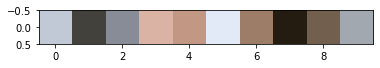

In [44]:
# coulurs comme une image d'1 ligne et 4 colonnes
imshow([couleurs])

In [45]:
choix(img[1, 2], couleurs)

array([162, 168, 176])

#### Nouvelle image

In [46]:
import numpy as np

In [47]:
nouvelle_image = np.array([[choix(col, couleurs) for col in row] for row in img])

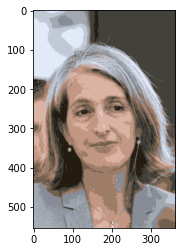

In [48]:
imshow(nouvelle_image)

### Détermination du nombre de classes

On essaie entre 1 à 20 couleurs

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
inertie = []

for nb in range(1, 20):
    print("calcul pour ", nb, "couleurs")
    kmeans = KMeans(n_clusters=nb,
                    n_init=10, 
                    max_iter=300).fit(data)
    inertie.append(kmeans.inertia_)

calcul pour  1 couleurs
calcul pour  2 couleurs
calcul pour  3 couleurs
calcul pour  4 couleurs
calcul pour  5 couleurs
calcul pour  6 couleurs
calcul pour  7 couleurs
calcul pour  8 couleurs
calcul pour  9 couleurs
calcul pour  10 couleurs
calcul pour  11 couleurs
calcul pour  12 couleurs
calcul pour  13 couleurs
calcul pour  14 couleurs
calcul pour  15 couleurs
calcul pour  16 couleurs
calcul pour  17 couleurs
calcul pour  18 couleurs
calcul pour  19 couleurs


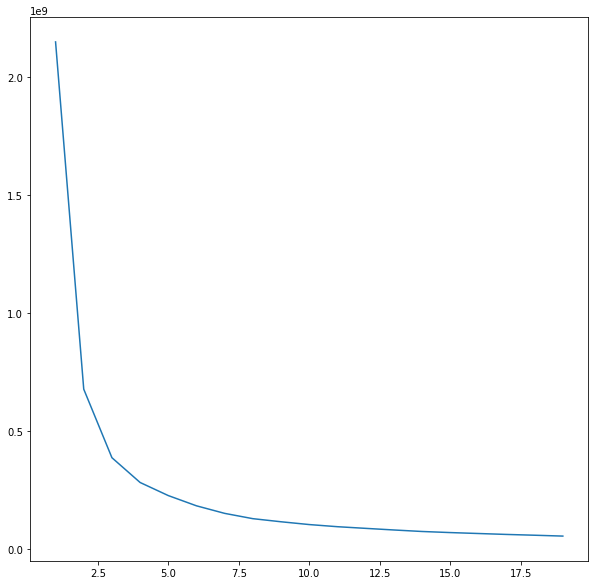

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x=list(range(1, len(inertie) + 1)), 
             y=inertie, 
             legend=False,
             ax=ax)
plt.show()

### Avec le nombre de classe optimal

In [52]:
kmeans = KMeans(n_clusters=6,
                n_init=10, 
                max_iter=300).fit(data)

In [53]:
couleurs = kmeans.cluster_centers_.astype(int)

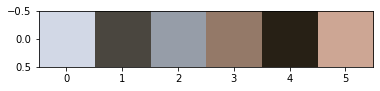

In [54]:
imshow([couleurs])

In [55]:
nouvelle_image = np.array([[choix(col, couleurs) for col in row] for row in img])

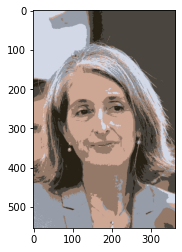

In [56]:
imshow(nouvelle_image)

### En changeant les couleurs

On va associer à chacune de nos 5 nouvelles couleurs à la couleur la plus proche d'une palette de couleurs

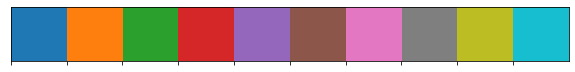

In [57]:
import seaborn as sns

current_palette = sns.color_palette()
sns.palplot(current_palette) # https://seaborn.pydata.org/tutorial/color_palettes.html
plt.show()

**Attention** : si vous tapez `sns.set()`comme on le faisait habituellement, seaborn va changer la représentation par défaut des images et donc nos dessins seront moins joli.

Chaque couleur de la palette est codée par 3 réels entre 0 et 1.

Par exemple la 1ère couleur : 

In [58]:
current_palette[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

Nos couleurs sont codées par 3 entiers entre 0 et 255. 

Il faut donc recréer convertir les courleurs de seaborn dans jeu de coordonnées

In [59]:
palette = []

for couleur in current_palette:
    conversion = (int(255 * couleur[0]), int(255 * couleur[1]), int(255 * couleur[2]))
    palette.append(conversion)

In [60]:
palette

[(31, 119, 180),
 (255, 127, 14),
 (44, 160, 44),
 (214, 39, 40),
 (148, 103, 189),
 (140, 86, 75),
 (227, 119, 194),
 (127, 127, 127),
 (188, 189, 34),
 (23, 190, 207)]

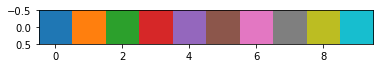

In [61]:
imshow([palette])

On peut maintenant refaire notre image (on utilise bien notre nouvelle image qui n'a plus que 6 couleurs, par l'image d'origine) : 

In [62]:
nouvelle_nouvelle_image = np.array([[choix(col, palette) for col in row] for row in nouvelle_image])

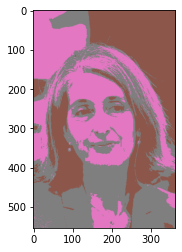

In [63]:
imshow(nouvelle_nouvelle_image)

On peut faire plein de variations possibles. Laissez parler le data artiste qui est en vous :-)